In [7]:
import os
import pandas as pd

directorio = './kaggle/input/train'

# Cálculo de medias
medias_por_csv2 = {}
for archivo in os.listdir(directorio):
    if archivo.endswith('.csv'): 
        ruta_csv = os.path.join(directorio, archivo)  
        id = archivo.split('.')[0]
        df = pd.read_csv(ruta_csv)
        media_sensor2 = df.mean()
        medias_por_csv2[id] = media_sensor2

# Cálculo de desviaciones estándar
desv_por_csv = {}
for archivo in os.listdir(directorio):
    if archivo.endswith('.csv'): 
        ruta_csv = os.path.join(directorio, archivo)  
        id = archivo.split('.')[0]
        df = pd.read_csv(ruta_csv)
        desv_sensor = df.std()
        desv_por_csv[id] = desv_sensor

# Crear DataFrames con los resultados
medias_df2 = pd.DataFrame.from_dict(medias_por_csv2, orient='index')
desv_df = pd.DataFrame.from_dict(desv_por_csv, orient='index')


In [19]:
print(medias_df2)

            sensor_1  sensor_2  sensor_3   sensor_4  sensor_5   sensor_6  \
1000015382  0.382244  2.266563  2.192213  -0.148031 -0.263129   1.630089   
1000554676 -3.828120  7.063966 -1.944734   4.876319 -0.007467  -2.306528   
1000745424  8.291928 -1.646423 -1.328611 -10.412410 -3.697388  -3.728005   
1001461087  2.071582  1.194780 -4.365761   3.556874  0.248929 -11.649356   
1001732002  0.904102 -4.544324 -1.232763   0.521858  0.749688   0.821386   
...              ...       ...       ...        ...       ...        ...   
998393594  -2.065582       NaN  0.130114   0.022200  0.129365  -0.733171   
998625201   0.822920       NaN       NaN   4.915701 -2.403510   1.902002   
998818197   2.583740  8.066766 -0.868786   5.304028  2.133364   9.800570   
998818893  -1.414143 -0.086515 -2.085999  -1.519791  0.748688   4.462642   
999761287  -1.900635  2.088499  0.662639  -7.275629       NaN  -0.277962   

            sensor_7   sensor_8  sensor_9  sensor_10  
1000015382 -0.615190  -0.177964 

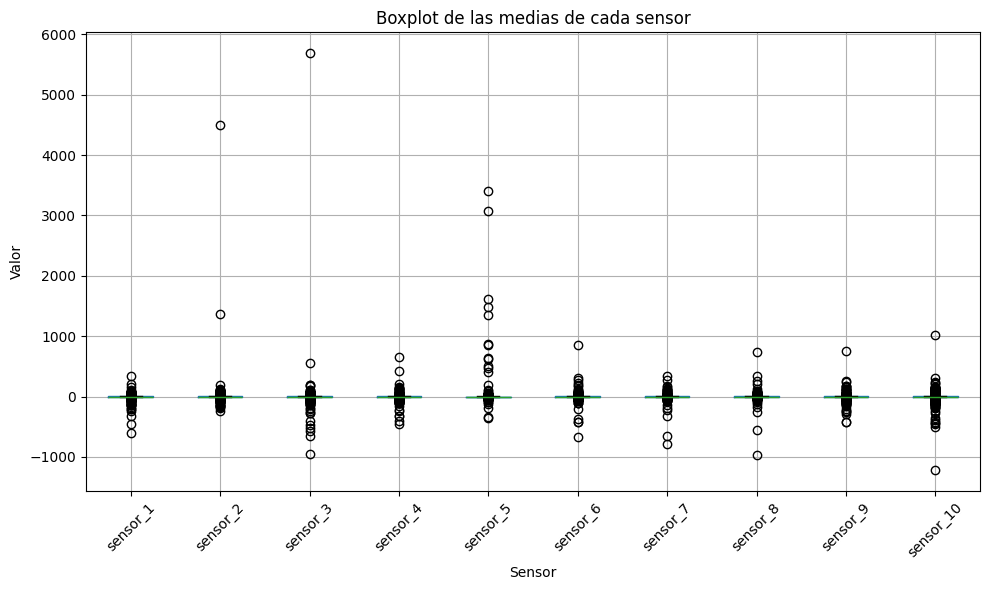

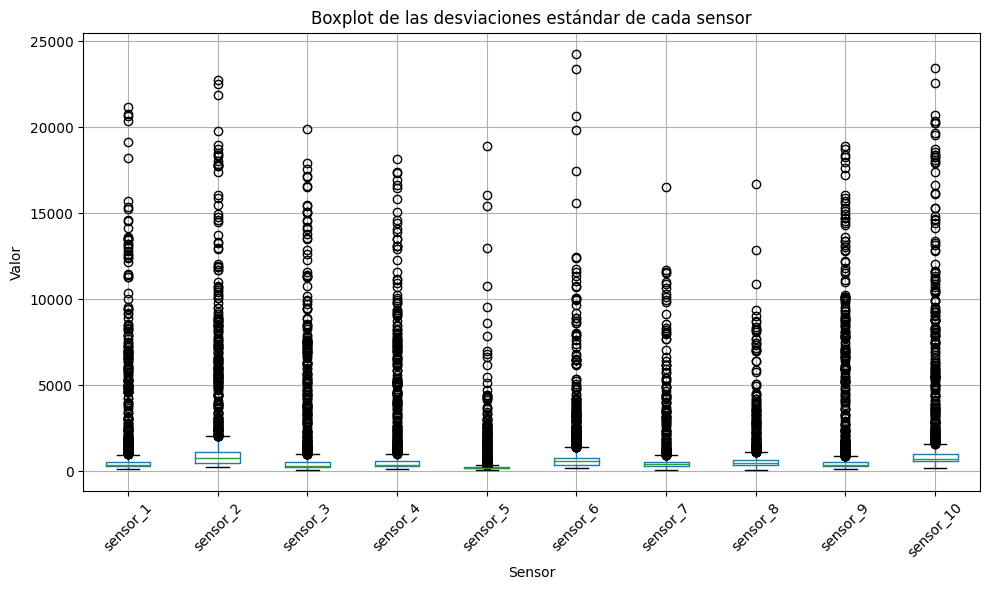

In [11]:
#BOXPLOT DE MEDIAS Y DESV
import matplotlib.pyplot as plt

def create_boxplot(data, title):
    plt.figure(figsize=(10, 6))
    data.boxplot()
    plt.title(title)
    plt.xlabel('Sensor')
    plt.ylabel('Valor')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

create_boxplot(medias_df2, 'Boxplot de las medias de cada sensor')
plt.savefig('graphs/boxplot_medias.png')
plt.show()

create_boxplot(desv_df, 'Boxplot de las desviaciones estándar de cada sensor')
plt.savefig('graphs/boxplot_desviaciones.png')
plt.show()

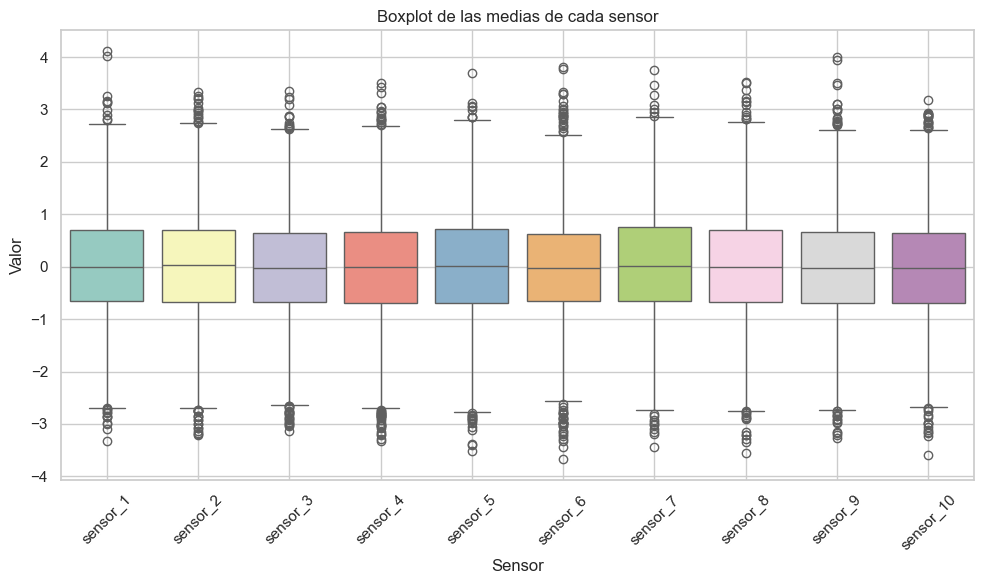

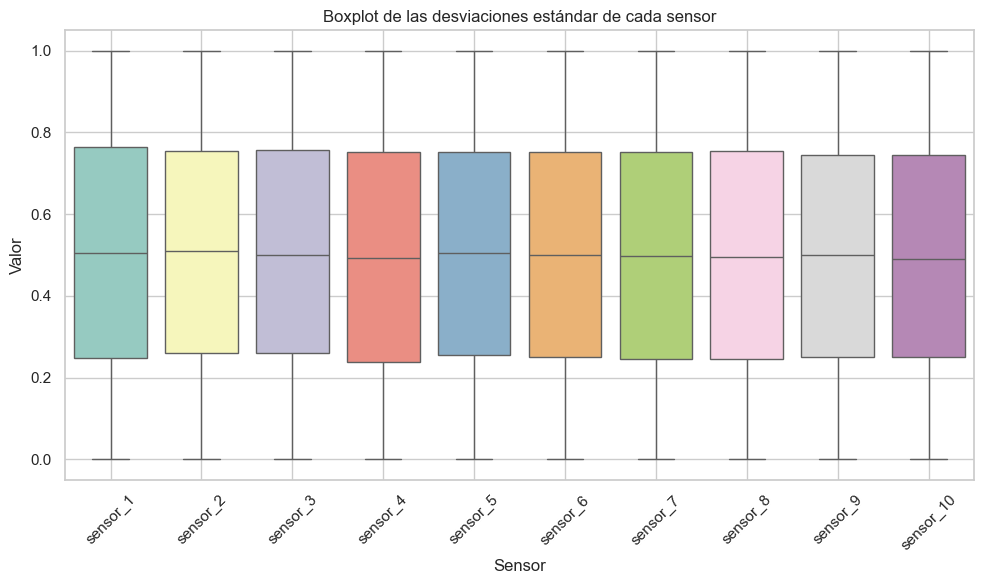

In [31]:
#BOXPLOT SEABORN
import seaborn as sns
import matplotlib.pyplot as plt

def create_boxplot_seaborn(data, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, palette="Set3")
    plt.title(title)
    plt.xlabel('Sensor')
    plt.ylabel('Valor')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

create_boxplot_seaborn(medias_df2, 'Boxplot de las medias de cada sensor')
plt.savefig('graphs/boxplot_medias_seaborn.png')
plt.show()

create_boxplot_seaborn(desv_df, 'Boxplot de las desviaciones estándar de cada sensor')
plt.savefig('graphs/boxplot_desviaciones_seaborn.png')
plt.show()

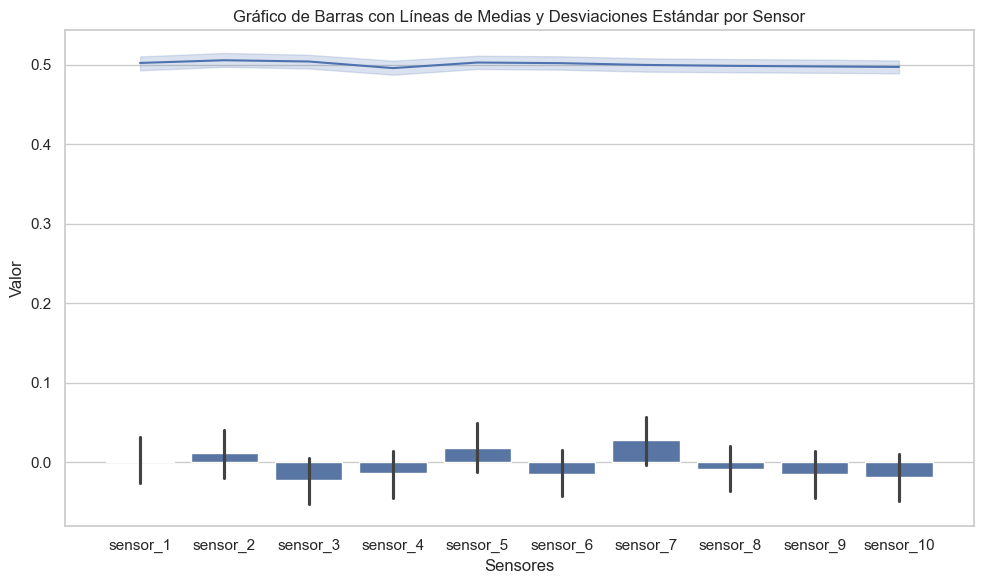

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

medias_stacked = medias_df2.stack().reset_index()
desv_stacked = desv_df.stack().reset_index()
medias_stacked.columns = ['ID', 'Sensor', 'Valor']
desv_stacked.columns = ['ID', 'Sensor', 'Valor']

plt.figure(figsize=(10, 6))
sns.barplot(data=medias_stacked, x='Sensor', y='Valor')
sns.lineplot(data=desv_stacked, x='Sensor', y='Valor', dashes=False, markers="o", legend=None)
plt.title('Gráfico de Barras con Líneas de Medias y Desviaciones Estándar por Sensor')
plt.xlabel('Sensores')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

In [2]:
#CONCATENAR DESV Y MEDIAS
num_sensores = 10
medias_df2.columns = [f"media_sensor_{i+1}" for i in range(num_sensores)]
desv_df.columns = [f"desv_sensor_{i+1}" for i in range(num_sensores)]

result = pd.concat([medias_df2, desv_df], axis=1)
result.index.name = 'ID'
print(result)

          media_sensor_1  media_sensor_2  media_sensor_3  media_sensor_4  \
ID                                                                         
11804308       -5.092998        6.698255       -7.885635       -1.456509   

          media_sensor_5  media_sensor_6  media_sensor_7  media_sensor_8  \
ID                                                                         
11804308        1.748118      -17.178347        5.938134      -10.923451   

          media_sensor_9  media_sensor_10  desv_sensor_1  desv_sensor_2  \
ID                                                                        
11804308       -1.540108       -12.331611     701.283817    1145.334672   

          desv_sensor_3  desv_sensor_4  desv_sensor_5  desv_sensor_6  \
ID                                                                     
11804308     693.098522     658.608746     270.494661    1708.439838   

          desv_sensor_7  desv_sensor_8  desv_sensor_9  desv_sensor_10  
ID                         

In [42]:
#AÑADIMOS EL TTE
train_df = pd.read_csv('kaggle/input/train.csv')

result.index = result.index.astype('int64')
dataframe = result.merge(train_df, left_index=True, right_on='segment_id', how='left')
dataframe['time_to_eruption'] = dataframe['time_to_eruption'].where(~dataframe['time_to_eruption'].isna(), None)

print(dataframe)
dataframe.to_csv('dataframe.csv', index=False)

      media_sensor_1  media_sensor_2  media_sensor_3  media_sensor_4  \
1901        0.382244        2.266563        2.192213       -0.148031   
1438       -3.828120        7.063966       -1.944734        4.876319   
2649        8.291928       -1.646423       -1.328611      -10.412410   
2402        2.071582        1.194780       -4.365761        3.556874   
1218        0.904102       -4.544324       -1.232763        0.521858   
...              ...             ...             ...             ...   
4247       -2.065582             NaN        0.130114        0.022200   
2626        0.822920             NaN             NaN        4.915701   
3774        2.583740        8.066766       -0.868786        5.304028   
2559       -1.414143       -0.086515       -2.085999       -1.519791   
3636       -1.900635        2.088499        0.662639       -7.275629   

      media_sensor_5  media_sensor_6  media_sensor_7  media_sensor_8  \
1901       -0.263129        1.630089       -0.615190       -0.1

In [6]:
#GUARDAR EL CSV DATAFRAME DE TRAIN
df = pd.read_csv("dataframe.csv")
df.set_index('segment_id', inplace=True, drop=False)

if 'segment_id' in df.columns:
    cols = df.columns.tolist()
    cols = ['segment_id'] + [col for col in cols if col != 'segment_id']
    df = df[cols]

df.to_csv("dataframe_mod.csv")

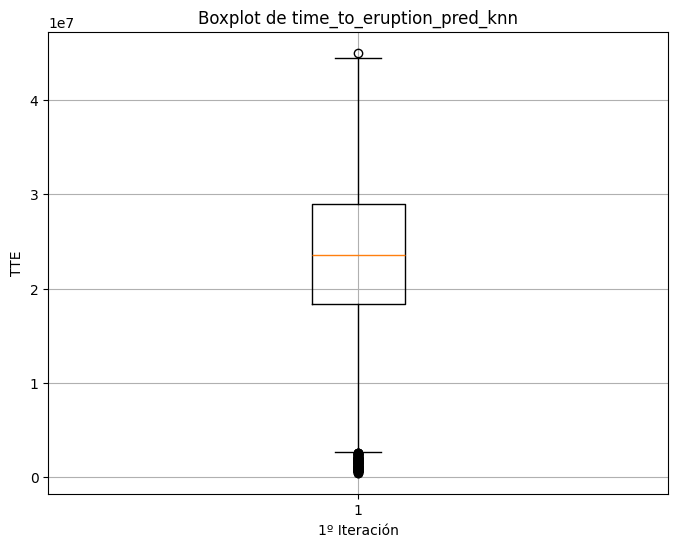

In [13]:
#BOXPLOT KNN
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("code/knn_iteration.csv")
tte = df["time_to_eruption_pred_knn"]

plt.figure(figsize=(8, 6))
plt.boxplot(tte)
plt.title('Boxplot de time_to_eruption_pred_knn')
plt.xlabel('1º Iteración')
plt.ylabel('TTE')
plt.grid(True)
plt.show()

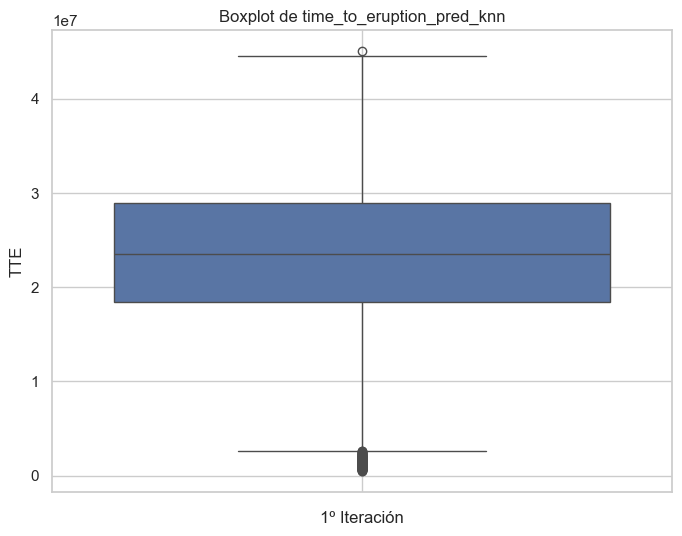

In [27]:
#TTE BOXPLOT SEABORN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("code/knn_iteration.csv")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='time_to_eruption_pred_knn')
plt.title('Boxplot de time_to_eruption_pred_knn')
plt.xlabel('1º Iteración')
plt.ylabel('TTE')
plt.grid(True)
plt.show()